In [35]:
#Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
#Mounting drive:
#from google.colab import drive 
#drive.mount('/content/drive')

## Understanding and Preprocessing of Data

Loading the recipes Dataset:

In [140]:
recipes = pd.read_csv("archive/RAW_recipes.csv")

In [141]:
#Glimpse of the recipes data:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [142]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [143]:
recipes['tags'][0]

"['60-minutes-or-less', 'time-to-make', 'course', 'main-ingredient', 'cuisine', 'preparation', 'occasion', 'north-american', 'side-dishes', 'vegetables', 'mexican', 'easy', 'fall', 'holiday-event', 'vegetarian', 'winter', 'dietary', 'christmas', 'seasonal', 'squash']"

In [144]:
recipes.shape
# 231637 rows and 12 columns

(231637, 12)

In [145]:
# Here we can see the datatype of the every attribute and howmany non-null values
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


Descriptions of the columns:

Name - Name of the Food

Id - Recipes' Id

Minutes- Time in Minutes

Contributor_id - Id of the person

Submitted  - Date on which the recipes are submitted

Tags - Tags to attract the viewer

Nutritions - Nutritions present in food

N_steps - No. of steps in recipes

Steps - Steps describing what to do in particular step

Description - Kind of reviews

Ingreidients - Name of the Ingredients required

N_ingredients - No of Ingredients


In [146]:
recipes.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


Average number of Steps, Ingredients and minutes.

In [147]:
# one name raw and 4979 description is missing in the data
recipes.isnull().sum()

name                 1
id                   0
minutes              0
contributor_id       0
submitted            0
tags                 0
nutrition            0
n_steps              0
steps                0
description       4979
ingredients          0
n_ingredients        0
dtype: int64

In [148]:
recipes.duplicated().sum()
# There is no any duplicate data in the dataset

0

## Exploratory Data Analysis and Plots

Plot between #of ingredients used in the reciepies.

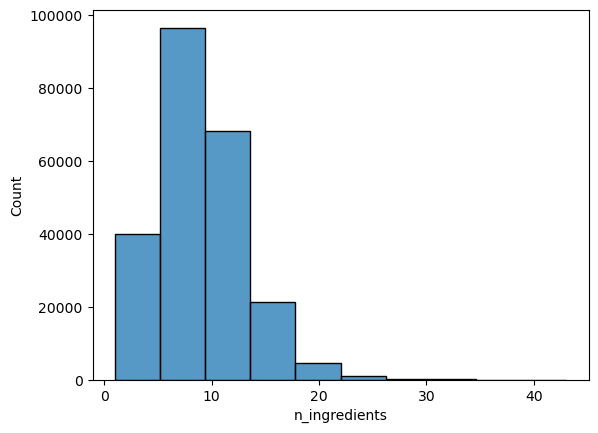

In [149]:
sns.histplot(data=recipes, x='n_ingredients', bins=10)
plt.show()

Top 10 most used Tags in the dataset.

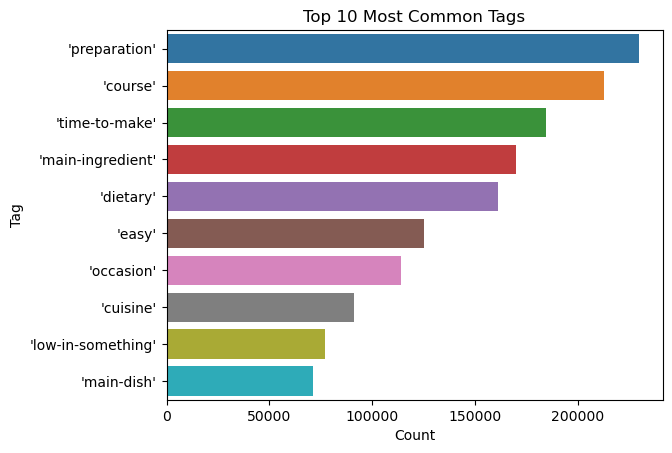

In [150]:
tags = recipes['tags'].str.split(',').explode().str.strip()
top_tags = tags.value_counts().head(10)
sns.barplot(x=top_tags.values, y=top_tags.index)
plt.title('Top 10 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.show()

Average no of the steps among all the reciepies

In [151]:
avg_steps = recipes['n_steps'].mean()
print(f"Average Number of Steps: {avg_steps}")

Average Number of Steps: 9.7654994668382


The average number of steps for recipes are 10.

Top 10 most used ingredients among the all reciepies

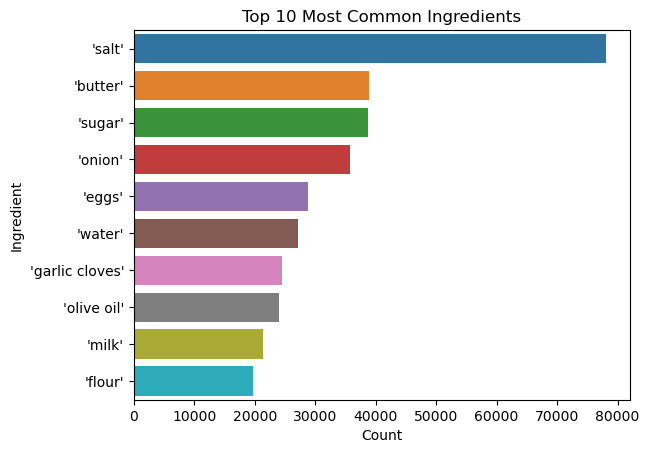

In [152]:
ingredients = recipes['ingredients'].str.split(',').explode().str.strip()
top_ingredients = ingredients.value_counts().head(10)
sns.barplot(x=top_ingredients.values, y=top_ingredients.index)
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Count')
plt.ylabel('Ingredient')
plt.show()

The most common used Ingredient in almost all recipes is Salt.

Rate of change in the rating according to the no. of ingredients used in the reciepe

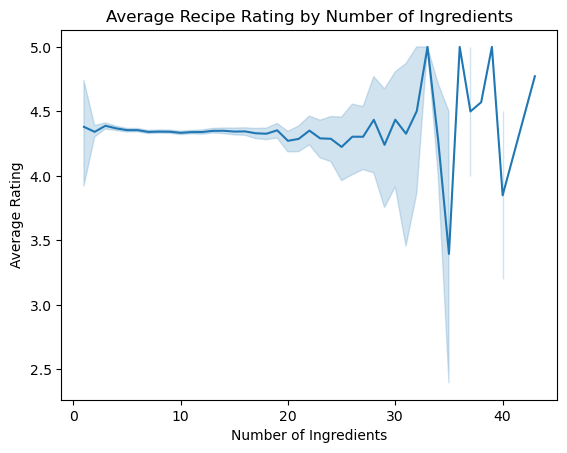

In [153]:
ingredients_df = recipes[['id', 'n_ingredients']]
ratings_df = pd.read_csv('archive/RAW_interactions.csv', usecols=['recipe_id', 'rating'])
ratings_df = ratings_df.groupby('recipe_id').mean().reset_index()
ratings_df = pd.merge(ratings_df, ingredients_df, left_on='recipe_id', right_on='id')
sns.lineplot(x='n_ingredients', y='rating', data=ratings_df)
plt.title('Average Recipe Rating by Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Average Rating')
plt.show()
#From the graph below it can be concluded that as the no of ingredients increases average rating by the user are fluctating more.

Loading Interactions Dataset:

In [154]:
interactions = pd.read_csv("archive/RAW_interactions.csv")

In [155]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [156]:
interactions.shape

(1132367, 5)

Descriptions:

User_id - Id of the User

Recipe_id - Id of the Recipe

date - Date for the recipe

Rating - Rating of the particular recipe

Review - Review to the Particular recipe

### EDA  on interactions Dataset

No. of Ratings done per Year.

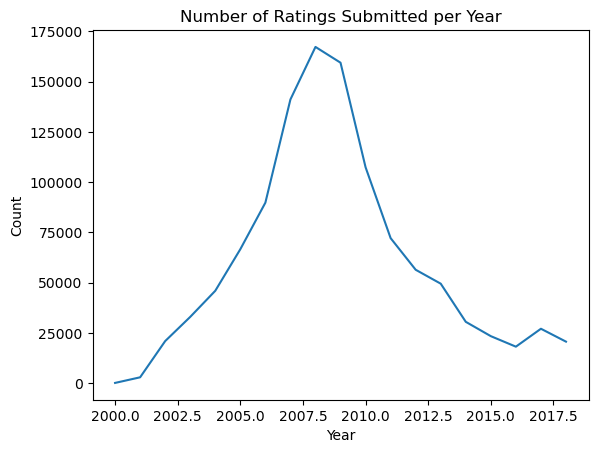

In [157]:
interactions['date'] = pd.to_datetime(interactions['date'])
rating_counts = interactions['date'].dt.year.value_counts().sort_index()
sns.lineplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Number of Ratings Submitted per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

From the above graph, we can say that maximun Ratings were done in between 2007 to 2010.

No. of Ratings for each rating scale (0,1,2,3,4,5)

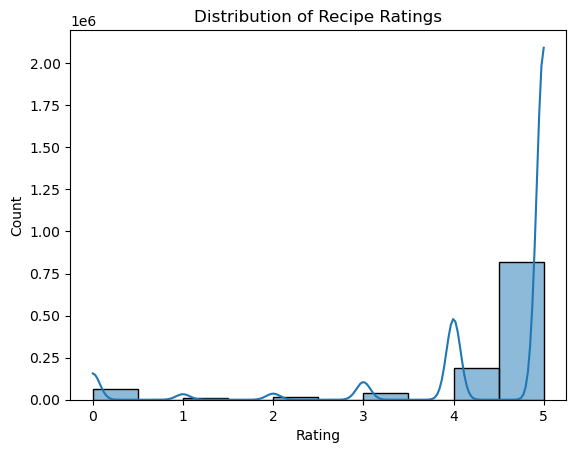

In [158]:
sns.histplot(data=interactions, x='rating', bins=10, kde=True)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

No. of ratings vs the length of the review.

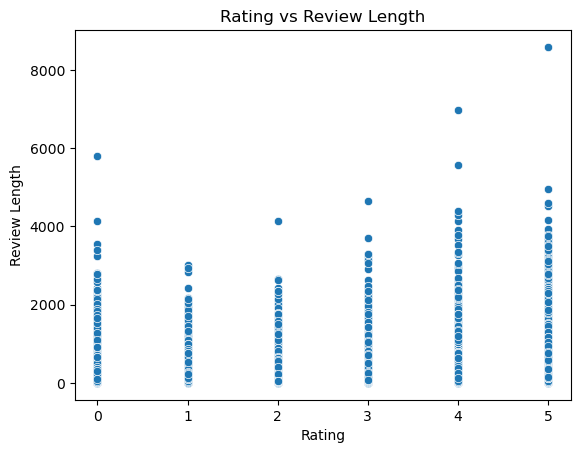

In [159]:
interactions['review_length'] = interactions['review'].str.len()
sns.scatterplot(x='rating', y='review_length', data=interactions)
plt.title('Rating vs Review Length')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

In [160]:
#Selcting some coulmns:
interactions.iloc[0:6, 4:5]

,review
0,Great with a salad. Cooked on top of stove for...
1,"So simple, so delicious! Great for chilly fall..."
2,This worked very well and is EASY. I used not...
3,I made the Mexican topping and took it to bunk...
4,"Made the cheddar bacon topping, adding a sprin..."
5,very very sweet. after i waited the 2 days i b...


In [161]:
#Checking the rating =5:
interactions.loc[interactions.rating==5]

,user_id,recipe_id,date,rating,review,review_length
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",205.0
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,68.0
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",73.0
9,273745,134728,2005-12-22,5,Better than the real!!,22.0
10,353911,134728,2006-09-26,5,Absolutely AWESOME! I was speechless when I tr...,209.0
...,...,...,...,...,...,...
1132359,2001898209,82303,2018-07-05,5,This is the best and easiest hot fudge ever. I...,166.0
1132360,2002357020,82303,2018-12-05,5,Delicious quick thick chocolate sauce with ing...,145.0
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...,363.0
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...,577.0


In [162]:
interactions.rating.isnull().sum()
#There is no null value in interactions for rating which is useful for collabrative filtering.

0

In [163]:
interactions.rating.describe()
# Mean rating for the whole data is 4.41

count    1.132367e+06
mean     4.411016e+00
std      1.264752e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [164]:
rating= interactions.rating

In [165]:
rating

0          4
1          5
2          4
3          5
4          5
          ..
1132362    0
1132363    5
1132364    5
1132365    4
1132366    5
Name: rating, Length: 1132367, dtype: int64

In [166]:
rating_count= interactions.groupby('rating').rating.count()
rating_count
# Maximum rating given is *5*

rating
0     60847
1     12818
2     14123
3     40855
4    187360
5    816364
Name: rating, dtype: int64

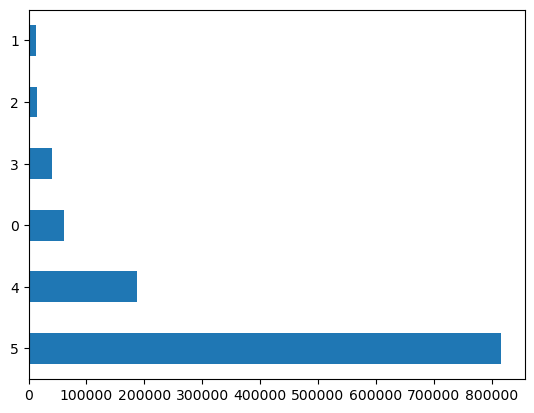

In [167]:
#Plotting the bar graph for rating counts:
interactions['rating'].value_counts().plot.barh()
plt.show()

In [31]:
#Merging the dataframes:
data= pd.merge(interactions, recipes, right_on= 'id', left_on= 'recipe_id')

In [32]:
data.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review', 'review_length',
       'name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')

In [33]:
#Checking is there any correlation between time and rating as easy and fast recipe more rating:
corr = data['rating'].corr(data['minutes'])
corr

0.0010534354642060852

No, there is no much relation between time and Rating by the user.

In [38]:
data.shape

(1132367, 18)

In [39]:
data.head()

,user_id,recipe_id,date,rating,review,review_length,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,138.0,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",205.0,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,99.0,devilicious cookie cake delights,44394,20,56824,2002-10-27,"['30-minutes-or-less', 'time-to-make', 'course...","[132.3, 11.0, 39.0, 5.0, 4.0, 11.0, 5.0]",5,"['blend together cake mix , oil and eggs', 'ad...",NaN,"[""devil's food cake mix"", 'vegetable oil', 'eg...",4
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,68.0,baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",73.0,baked potato toppings,85009,10,64342,2004-02-25,"['15-minutes-or-less', 'time-to-make', 'course...","[2786.2, 342.0, 134.0, 290.0, 161.0, 301.0, 42.0]",3,['pick whichever topping you want to use and c...,these toppings sure makes a nice change from p...,"['mayonnaise', 'salsa', 'cheddar cheese', 'ref...",13


In [40]:
#Dropping the Columns from the Final DataFrame which are not useful:
data.drop(['user_id', 'submitted','contributor_id', 'id'], axis =1,inplace= True)

In [41]:
data.describe()

,recipe_id,rating,review_length,minutes,n_steps,n_ingredients
count,1.132367e+06,1.132367e+06,1.132198e+06,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.608972e+05,4.411016e+00,2.784095e+02,3.614684e+04,9.627970e+00,8.952028e+00
std,1.303987e+05,1.264752e+00,1.973972e+02,8.796494e+06,5.819689e+00,3.689908e+00
min,3.800000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,5.425700e+04,4.000000e+00,1.470000e+02,2.000000e+01,6.000000e+00,6.000000e+00
50%,1.205470e+05,5.000000e+00,2.370000e+02,4.000000e+01,8.000000e+00,9.000000e+00
75%,2.438520e+05,5.000000e+00,3.580000e+02,7.000000e+01,1.200000e+01,1.100000e+01
max,5.377160e+05,5.000000e+00,8.587000e+03,2.147484e+09,1.450000e+02,4.300000e+01


Minutes and n_steps have Outliers.

Making different Columns for important Nutrients.

In [42]:
#Data Processing:
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] = data.nutrition.str.split(",",expand=True) 
data['calories'] = data['calories'].apply(lambda x: x.replace("[" ,""))
data['carbohydrates'] = data['carbohydrates'].apply(lambda x: x.replace("]" ,""))
data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']] =  data[['calories','total fat','sugar','sodium','protein','saturated fat','carbohydrates']].astype(float)

Plotting the Data in different Forms as to get idea about the Dataset:

C:\Users\admin\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\anaconda3\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='n_steps', ylabel='Density'>

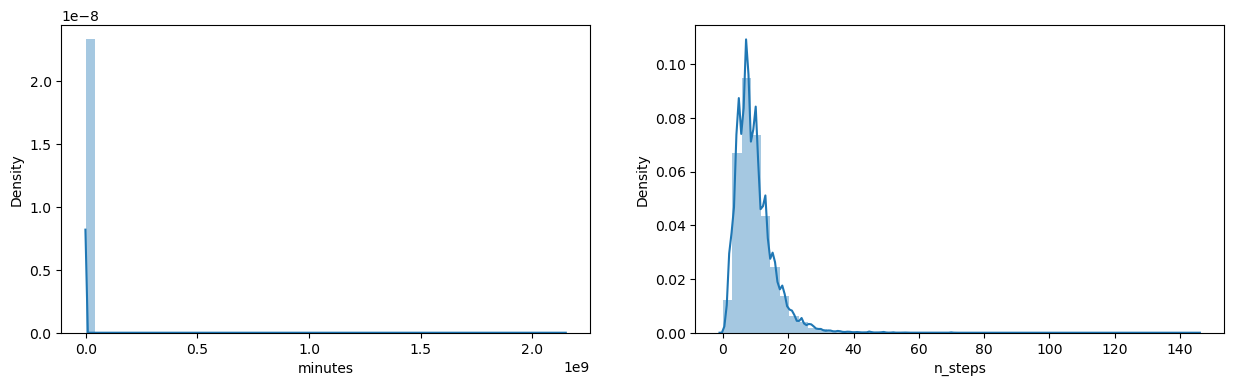

In [43]:
#Plotting graphs:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.distplot(data['minutes'], ax = ax[0])
sns.distplot(data['n_steps'], ax=ax[1])

<AxesSubplot:>

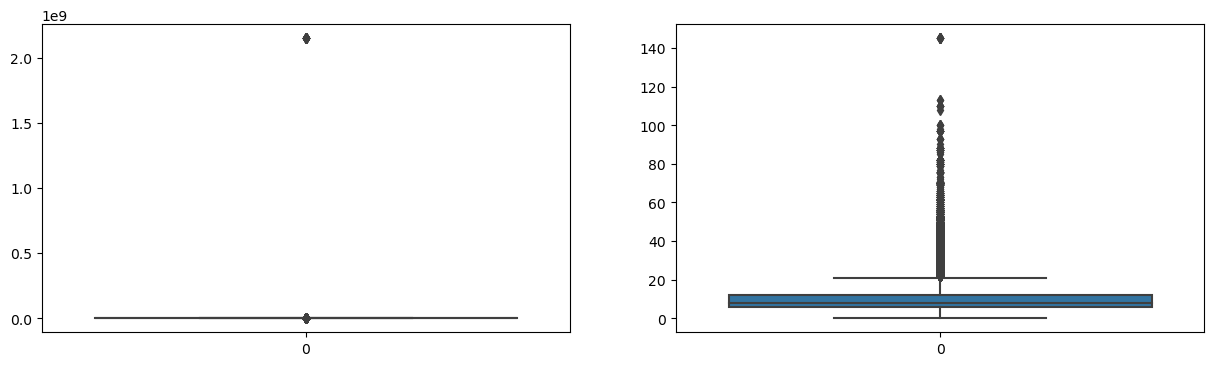

In [44]:
#Boxplot:
fig,ax = plt.subplots(1,2,figsize=(15,4))
sns.boxplot(data = data['minutes'], ax=ax[0])
sns.boxplot(data=data['n_steps'], ax= ax[1])

In [45]:
#Quartiles:
q1 = np.percentile(data['minutes'], 25)
q3 = np.percentile(data['minutes'], 75)
IQR = q3-q1
upper = q3 +1.5*IQR
lower= q1 - 1.5*IQR
data = data.drop((data[data['minutes']>= upper].index | data[data['minutes']<=lower].index),axis=0)

C:\Users\admin\AppData\Local\Temp\ipykernel_27020\711150843.py:7: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  data = data.drop((data[data['minutes']>= upper].index | data[data['minutes']<=lower].index),axis=0)


<AxesSubplot:>

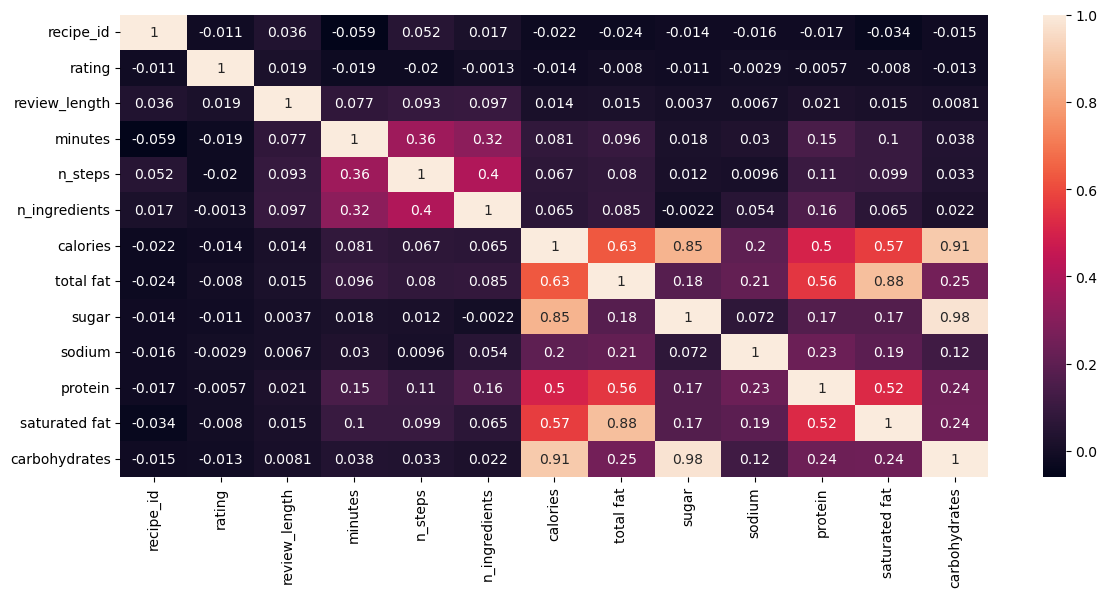

In [46]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='n_ingredients', ylabel='minutes'>

C:\Users\admin\anaconda3\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


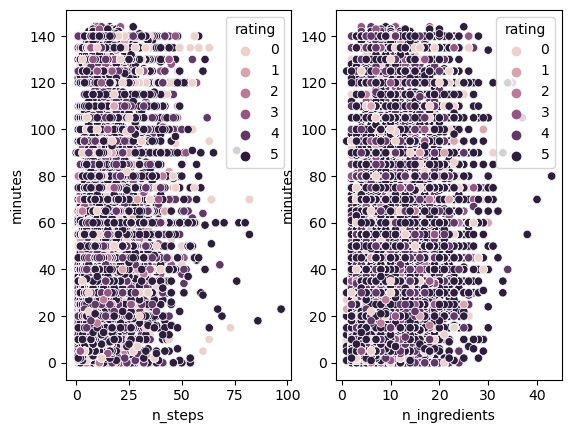

In [47]:
#Scatterplot of n_steps with minutes and n_ingredients with minutes:
fig,ax = plt.subplots(1,2)
sns.scatterplot(data = data, x ='n_steps', y='minutes', hue='rating', ax= ax[0])
sns.scatterplot(data=data, x ='n_ingredients', y='minutes', hue='rating', ax= ax[1])

<AxesSubplot:xlabel='carbohydrates', ylabel='sugar'>

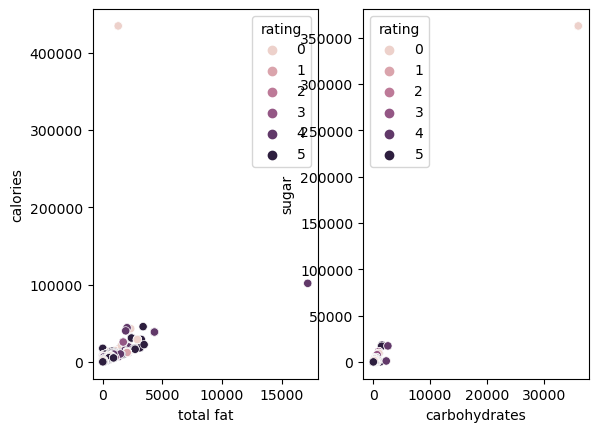

In [48]:
#Scatterplot of totalfat with calories and carbohydrates with sugar representing rating:
fig, ax = plt.subplots(1,2)
sns.scatterplot(data= data, x='total fat', y ='calories', hue ='rating', ax=ax[0])
sns.scatterplot(data = data, x='carbohydrates', y='sugar', hue='rating', ax= ax[1])

<AxesSubplot:xlabel='n_steps', ylabel='n_ingredients'>

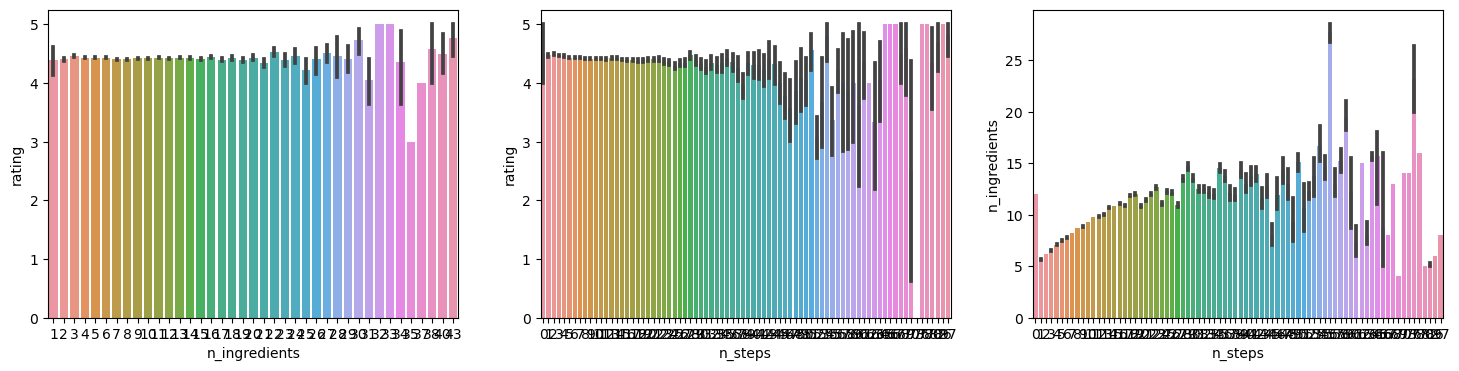

In [49]:
#To visualize the DataFrame:
fig, ax = plt.subplots(1,3, figsize=(18,4))
sns.barplot(data=data, y='rating', x='n_ingredients', ax=ax[0])
sns.barplot(data= data, y='rating', x= 'n_steps', ax=ax[1])
sns.barplot(data= data, y='n_ingredients', x='n_steps',ax=ax[2])

In [50]:
data.isnull().sum()

recipe_id            0
date                 0
rating               0
review             150
review_length      150
name                 1
minutes              0
tags                 0
nutrition            0
n_steps              0
steps                0
description      20634
ingredients          0
n_ingredients        0
calories             0
total fat            0
sugar                0
sodium               0
protein              0
saturated fat        0
carbohydrates        0
dtype: int64

In [51]:
#Dropping the Null Valued Columns:
data.dropna(inplace=True)

In [52]:
#Checking the Removal of null values:
data.isnull().sum()

recipe_id        0
date             0
rating           0
review           0
review_length    0
name             0
minutes          0
tags             0
nutrition        0
n_steps          0
steps            0
description      0
ingredients      0
n_ingredients    0
calories         0
total fat        0
sugar            0
sodium           0
protein          0
saturated fat    0
carbohydrates    0
dtype: int64

Differinating the Veg and Non-Veg Food Recipe:

In [168]:
#Differinating the Vag and Non-Veg Food Recipe:
from ast import literal_eval
nonveg_ingres= ['egg','egg whites']
def ingredients_check(data):
  veg = 0
  for a in literal_eval(data):
    if a in nonveg_ingres:
      veg=1
    else:
      veg =0
  return veg
recipes['nonveg']= recipes['ingredients'].apply(ingredients_check)

In [169]:
recipes.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'nonveg'],
      dtype='object')

In [170]:
recipes['nonveg'].value_counts()

0    230121
1      1516
Name: nonveg, dtype: int64

# Recommender Systems

## Popularity Based  Recommender System

In [171]:
#Dropping the columns from interction Dataset:
interactions1 = interactions.drop(['user_id', 'date','review'], axis =1)

In [172]:
interactions1.head()

,recipe_id,rating,review_length
0,40893,4,138.0
1,40893,5,205.0
2,44394,4,99.0
3,85009,5,68.0
4,85009,5,73.0


In [173]:
interactions1.shape

(1132367, 3)

In [174]:
#Storing average rating of meals:
c = interactions1['rating'].mean()

In [175]:
#Grouping meal rating and get average meal score 
interactions2 = interactions1.groupby(['recipe_id'])['rating'].agg(['mean', 'count'])
interactions2.reset_index(inplace = True)

In [176]:
#Rename Columns:
interactions2.rename(columns = {'mean': 'average_rating','count':'votes'}, inplace = True)

In [177]:
interactions2

,recipe_id,average_rating,votes
0,38,4.250000,4
1,39,3.000000,1
2,40,4.333333,9
3,41,4.500000,2
4,43,1.000000,1
...,...,...,...
231632,537459,5.000000,1
231633,537485,5.000000,1
231634,537543,0.000000,1
231635,537671,0.000000,1


Average rating of the particular reciepe.

In [178]:
#Merging interactions2 with recipes:
food = pd.merge(recipes, interactions2, left_on='id', right_on='recipe_id')

In [179]:
food.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients', 'nonveg', 'recipe_id', 'average_rating', 'votes'],
      dtype='object')

In [180]:
#No. of Votes:
q = interactions2['votes'].quantile(0.9)
print(q)

9.0


In [181]:
#Meals with high no.of votes:
top_food = food.copy().loc[interactions2['votes']>=q]

In [182]:
#Popularity Recommendation System:
top_food

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,nonveg,recipe_id,average_rating,votes
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,0,112140,4.000000,1
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6,0,70971,5.000000,2
15,chicken lickin good pork chops,63986,500,14664,2003-06-06,"['weeknight', 'time-to-make', 'course', 'main-...","[105.7, 8.0, 0.0, 26.0, 5.0, 4.0, 3.0]",5,"['dredge pork chops in mixture of flour , salt...",here's and old standby i enjoy from time to ti...,"['lean pork chops', 'flour', 'salt', 'dry must...",7,0,63986,4.368421,19
17,chinese candy,23933,15,35268,2002-03-29,"['15-minutes-or-less', 'time-to-make', 'course...","[232.7, 21.0, 77.0, 4.0, 6.0, 38.0, 8.0]",4,['melt butterscotch chips in heavy saucepan ov...,"a little different, and oh so good. i include ...","['butterscotch chips', 'chinese noodles', 'sal...",3,0,23933,4.833333,12
50,keep it going german friendship cake,26995,14450,37305,2002-04-30,"['weeknight', 'time-to-make', 'course', 'main-...","[724.4, 38.0, 297.0, 20.0, 18.0, 31.0, 39.0]",13,['mix starter ingredients in a bowl and let st...,"yes, this sounds bizarre, but it really is tas...","['flour', 'water', 'dry yeast', 'milk', 'sugar...",17,0,26995,3.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231195,zucchini hummus,481002,10,248812,2012-06-15,"['15-minutes-or-less', 'time-to-make', 'course...","[203.2, 27.0, 6.0, 31.0, 9.0, 12.0, 3.0]",2,['combine all ingredients and blend until smoo...,no bean hummus recipe,"['zucchini', 'tahini', 'fresh lemon juice', 'o...",7,0,481002,0.000000,1
231224,zucchini loaf,385825,40,458718,2009-08-17,"['60-minutes-or-less', 'time-to-make', 'course...","[144.7, 5.0, 60.0, 10.0, 6.0, 3.0, 8.0]",8,['shred zucchini and put into a strainer and p...,a nice moist loaf and a great way to use some ...,"['eggs', 'applesauce', 'raw zucchini', 'sugar'...",11,0,385825,5.000000,1
231317,zucchini pistachio bread,95938,70,24386,2004-07-20,"['time-to-make', 'course', 'preparation', 'bre...","[1969.4, 160.0, 547.0, 54.0, 52.0, 67.0, 79.0]",5,"['mix together first 6 ingredients', 'sift all...",moist and delicious. a new twist on zucchini b...,"['eggs', 'oil', 'sugar', 'zucchini', 'vanilla ...",12,0,95938,5.000000,2
231402,zucchini stuffing,37264,70,50976,2002-08-15,"['weeknight', 'time-to-make', 'course', 'main-...","[51.2, 2.0, 7.0, 4.0, 5.0, 3.0, 2.0]",7,"['take a casserole dish', 'dice zucchini add t...",make using one dish. very easy and will modify...,"['zucchini', 'onion', 'breadcrumbs', 'parmesan...",8,0,37264,4.454545,11


In [183]:
#Function for weighted rating:
def weighted_rating(x, m=q, c=c):
  v = x['votes']
  R = x['average_rating']
  return (v/(v+m)*R) +(m/(m+v)*c)

In [184]:
top_food['Score'] = top_food.apply(weighted_rating, axis=1)
food['Score'] = food.apply(weighted_rating, axis=1)

In [185]:
#Sorting the best meals on Rating:
top_food = top_food.sort_values('Score', ascending=False)

In [186]:
#Top 20 Recipes:
top_food[['name', 'votes', 'average_rating', 'Score']].head(20)

,name,votes,average_rating,Score
14346,baked ham glazed with pineapple and chipotle p...,27,5.000000,4.852754
51504,chocolate raspberry or strawberry tall cake,37,4.945946,4.841286
177694,rr s caramelized onions,30,4.966667,4.838440
134161,mexican coffee caf mexicano,36,4.944444,4.837759
128474,magic white sauce and variations,23,5.000000,4.834348
192238,southeastern north carolina pulled pork,22,5.000000,4.829005
173099,reuben sandwich our way,20,5.000000,4.817212
83175,feta marinated,20,5.000000,4.817212
2165,a 1 cherry cobbler tart a1,20,5.000000,4.817212
224503,warm roasted root vegetable and chicken salad ...,47,4.893617,4.816056


### Data Preprocessing for Other Recommendation System:

In [187]:
chunk = interactions.iloc[0:10000, :]

We have taken the chunk of 10000 raws because the ram was not eenough.

## User-User 

In [188]:
user_item_matrix = chunk.pivot_table(index='user_id', columns='recipe_id', values='rating')
user_item_matrix

recipe_id,355,360,503,635,658,688,696,1207,3000,3063,...,518015,520769,521583,523223,523426,527325,531712,532629,533575,534896
user_id,,,,,,,,,,,,,,,,,,,,,
1535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002307420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002312290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002329856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [192]:
from sklearn.metrics.pairwise import cosine_similarity
user_item_matrix[np.isnan(user_item_matrix)] = 0
# Calculate the similarity between users using Cosine
user_similarity = cosine_similarity(user_item_matrix)

In [193]:
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [191]:
target_user_id = 50 
similar_users_indices = np.argsort(user_similarity[target_user_id])[::-1][:10]
similar_users_ratings = user_item_matrix.iloc[similar_users_indices]
similar_users_ratings

recipe_id,355,360,503,635,658,688,696,1207,3000,3063,...,518015,520769,521583,523223,523426,527325,531712,532629,533575,534896
user_id,,,,,,,,,,,,,,,,,,,,,
11815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002356883,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
269480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
268501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Similarity matrix for the user no 50 top 10 similar users.

In [194]:
# Predict the rating that the target user would give to a particular recipe based on the ratings of similar users
target_user_ratings = user_item_matrix.iloc[target_user_id]
predicted_ratings = similar_users_ratings.apply(lambda x: np.average(x.dropna(), weights=user_similarity[target_user_id][similar_users_indices]))

# Generate a list of recipe recommendations for the target user based on the predicted ratings
recommended_recipe_ids = predicted_ratings.sort_values(ascending=False)[:10].index.tolist()

recommended_recipes = recipes[recipes['id'].isin(recommended_recipe_ids)]
# print(recommended_recipes)

result = pd.DataFrame(recommended_recipes)

result['name']

6664                           apple crisp
13617        baked buffalo chicken breasts
17815         barbecued limb rat  squirrel
41733            cherry chocolate brownies
48277          chinese buffet style donuts
61960     creamed cabbage  norwegian style
108454    hot   sweet german style mustard
189015          slow cooker nacho bean dip
192283        southern buttermilk biscuits
222819              venison summer sausage
Name: name, dtype: object

Top 10 Recommended recipes according to the target users taste.

Here we have predicted the ratings by simply averaging the similar users available ratings.

In [195]:
from sklearn.metrics.pairwise import pairwise_distances

# Calculate the similarity between users using Pearson correlation
user_similarity = 1 - pairwise_distances(user_item_matrix, metric='correlation')

target_user_id = 50
similar_users_indices = np.argsort(user_similarity[target_user_id])[::-1][:10]
similar_users_ratings = user_item_matrix.iloc[similar_users_indices]

# Predict the rating that the target user would give to a particular recipe based on the ratings of similar users
target_user_ratings = user_item_matrix.iloc[target_user_id]
predicted_ratings = similar_users_ratings.apply(lambda x: np.average(x.dropna(), weights=user_similarity[target_user_id][similar_users_indices]))

# Generate a list of recipe recommendations for the target user based on the predicted ratings
recommended_recipe_ids = predicted_ratings.sort_values(ascending=False)[:10].index.tolist()

# Print the recommended recipes
recommended_recipes = recipes[recipes['id'].isin(recommended_recipe_ids)]
result = pd.DataFrame(recommended_recipes)
result['name']

6664                               apple crisp
15569                 baked zucchini frittatas
49410                       chocolate biscotti
59193                     country rice pudding
64179                             creme brulee
67310    crunchy pretzel drops no bake cookies
68286           curried beef and chicken satay
72125                               dill bread
73637                     dried fruit roll ups
80865                  enzo s penne a la vodka
Name: name, dtype: object

##### Here We can see that the recommended list is mostly similar to the list recommended above with the cosine similarity

## Item-Item

In [196]:
# Calculate the similarity between users using Cosine
recipe_similarity = cosine_similarity(user_item_matrix.T)

# Select the most similar recipes to the target recipe
target_recipe_id = 50
similar_recipe_indices = np.argsort(recipe_similarity[target_recipe_id])[::-1][:10]
similar_recipe_ratings = user_item_matrix.T.iloc[similar_recipe_indices]

# Predict the rating that the target user would give to a particular recipe based on the ratings of similar recipes
target_recipe_ratings = user_item_matrix.iloc[target_user_id]
predicted_ratings_recipe = similar_recipe_ratings.apply(lambda x: np.average(x.dropna(), weights=recipe_similarity[target_recipe_id][similar_recipe_indices]))

# Generate a list of recipe recommendations for the target user based on the predicted ratings
recommended_recipe_ids_recipe = predicted_ratings_recipe.sort_values(ascending=False)[:10].index.tolist()

recommended_recipes_recipe = recipes[recipes['id'].isin(recommended_recipe_ids_recipe)]

result = pd.DataFrame(result)
result['name']

6664                               apple crisp
15569                 baked zucchini frittatas
49410                       chocolate biscotti
59193                     country rice pudding
64179                             creme brulee
67310    crunchy pretzel drops no bake cookies
68286           curried beef and chicken satay
72125                               dill bread
73637                     dried fruit roll ups
80865                  enzo s penne a la vodka
Name: name, dtype: object

In [197]:
# Calculate the similarity between users using Pearson Correlation
recipe_similarity = 1 - pairwise_distances(user_item_matrix.T, metric='correlation')

# Select the most similar recipes to the target recipe
target_recipe_id = 50
similar_recipe_indices = np.argsort(recipe_similarity[target_recipe_id])[::-1][:10]
similar_recipe_ratings = user_item_matrix.T.iloc[similar_recipe_indices]

# Predict the rating that the target user would give to a particular recipe based on the ratings of similar recipes
target_recipe_ratings = user_item_matrix.iloc[target_user_id]
predicted_ratings_recipe = similar_recipe_ratings.apply(lambda x: np.average(x.dropna(), weights=recipe_similarity[target_recipe_id][similar_recipe_indices]))

# Generate a list of recipe recommendations for the target user based on the predicted ratings
recommended_recipe_ids_recipe = predicted_ratings_recipe.sort_values(ascending=False)[:10].index.tolist()

recommended_recipes_recipe = recipes[recipes['id'].isin(recommended_recipe_ids_recipe)]

result = pd.DataFrame(result)
result['name']

6664                               apple crisp
15569                 baked zucchini frittatas
49410                       chocolate biscotti
59193                     country rice pudding
64179                             creme brulee
67310    crunchy pretzel drops no bake cookies
68286           curried beef and chicken satay
72125                               dill bread
73637                     dried fruit roll ups
80865                  enzo s penne a la vodka
Name: name, dtype: object

There is no defference when we use cosine and pearson correlation on the item-item similarity.

In [ ]:
#Novelity (Surprise Library):

In [201]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['user_id', 'recipe_id', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train an SVD model on the training set
model = SVD(n_factors=50, n_epochs=20, lr_all=0.01, reg_all=0.4)
model.fit(trainset)

# Predict the ratings of the test set using the trained SVD model
predictions = model.test(testset)

# Evaluate the accuracy of the predictions using RMSE
rmse = accuracy.rmse(predictions)

# Make recommendations for a particular user
target_user_id = 50
target_user_items = df.loc[df['user_id'] == target_user_id, 'recipe_id']
target_user_unrated_items = df.loc[~df['recipe_id'].isin(target_user_items), 'recipe_id']

# Generate predicted ratings for unrated items
predicted_ratings = []
for item_id in target_user_unrated_items:
    predicted_rating = model.predict(target_user_id, item_id).est
    predicted_ratings.append((item_id, predicted_rating))

# Sort the predicted ratings in descending order and recommend the top 10 unrated items
recommended_recipe_ids = [item[0] for item in sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:10]]
recommended_recipes = df[df['recipe_id'].isin(recommended_recipe_ids)]
print("Recommended recipes:\n", recommended_recipes['name'])

RMSE: 1.4822
Recommended recipes:
 0     white bean   green chile pepper soup
1     white bean   green chile pepper soup
2         devilicious cookie cake delights
3                    baked potato toppings
4                    baked potato toppings
5                      sugared raspberries
6                      sugared raspberries
7                      sugared raspberries
8                     kfc honey bbq strips
9                     kfc honey bbq strips
10                    kfc honey bbq strips
11                    kfc honey bbq strips
12                    kfc honey bbq strips
13                    kfc honey bbq strips
14                    kfc honey bbq strips
Name: name, dtype: object


SVD with RMSE - 1.485

In [202]:
model = SVD(n_factors=50, n_epochs=20, lr_all=0.01, reg_all=0.4)
model.fit(trainset)

# Predict the ratings of the test set using the trained SVD model
predictions = model.test(testset)

# Evaluate the accuracy of the predictions using RMSE
mae = accuracy.mae(predictions)

# Make recommendations for a particular user
target_user_id = 50
target_user_items = df.loc[df['user_id'] == target_user_id, 'recipe_id']
target_user_unrated_items = df.loc[~df['recipe_id'].isin(target_user_items), 'recipe_id']

# Generate predicted ratings for unrated items
predicted_ratings = []
for item_id in target_user_unrated_items:
    predicted_rating = model.predict(target_user_id, item_id).est
    predicted_ratings.append((item_id, predicted_rating))

# Sort the predicted ratings in descending order and recommend the top 10 unrated items
recommended_recipe_ids = [item[0] for item in sorted(predicted_ratings, key=lambda x: x[1], reverse=True)[:10]]
recommended_recipes = df[df['recipe_id'].isin(recommended_recipe_ids)]
print("Recommended recipes:\n", recommended_recipes['name'])

MAE:  1.0618
Recommended recipes:
 0     white bean   green chile pepper soup
1     white bean   green chile pepper soup
2         devilicious cookie cake delights
3                    baked potato toppings
4                    baked potato toppings
5                      sugared raspberries
6                      sugared raspberries
7                      sugared raspberries
8                     kfc honey bbq strips
9                     kfc honey bbq strips
10                    kfc honey bbq strips
11                    kfc honey bbq strips
12                    kfc honey bbq strips
13                    kfc honey bbq strips
14                    kfc honey bbq strips
Name: name, dtype: object


SVD with MAE 1.06

Here, we are using the Cosine similarity for the user user similarity as it is cost effective similarity function to calculate.

#Comparing the Systems:

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# # Load test data
# test_data = pd.read_csv("archive/interactions_test.csv")

# # Load recipes data
# recommendations = pd.read_csv("archive/RAW_recipes.csv")

In [ ]:
# Merge test data and recommendations
# merged_data = pd.merge(test_data, recommendations, on="user_id")

In [ ]:
# # Calculate precision, recall, and F1 score
# precision = precision_score(merged_data["actual"], merged_data["predicted"], average="micro")
# recall = recall_score(merged_data["actual"], merged_data["predicted"], average="micro")
# f1 = f1_score(merged_data["actual"], merged_data["predicted"], average="micro")

# print("Precision: {:.3f}".format(precision))
# print("Recall: {:.3f}".format(recall))
# print("F1 score: {:.3f}".format(f1))

#MultiRound System:

User-User Similarity Multi-Round Recommendation System:

In [ ]:
def multi_round_recommendation(num_rounds=5, num_recommendations=10):
  recommended_recipe_ids = set()
  for round in range(num_rounds):
    #Choose a random Number:
    user_id = np.random.choice(user_similarity.shape[0])
    
    #Get recommendations for the user:
    recommended_recipes = recommended_recipes(user_id, num_recommendations)

    #Add the recommendations to the set of recommended recipe IDs:
    recommended_recipe_ids.update(recommended_recipes)

  return list(recommended_recipe_ids)

Item-Item Similarity Multi-Round Recommendation System:

In [ ]:
def multi_round_recommendation(num_rounds=5, num_recommendations=10):
    recommended_recipe_ids = set()
    for round in range(num_rounds):
        # Choose a random set of items
        item_ids = np.random.choice(item_similarity.shape[0], size=5, replace=False)
        # Get recommendations for the items
        recommended_recipes = recommend_recipes(item_ids, num_recommendations)
        # Add the recommendations to the set of recommended recipe IDs
        recommended_recipe_ids.update(recommended_recipes)
    return list(recommended_recipe_ids)

Matrix Factorization SVD Multi-Round Recommendation System:

In [ ]:
def multi_round_recommendation(num_rounds=5, num_recommendations=10):
    recommended_recipe_ids = set()
    for round in range(num_rounds):
        # Choose a random set of items
        item_ids = np.random.choice(svd.components_.shape[1], size=5, replace=False)
        # Get recommendations for the items
        recommended_recipes = recommend_recipes(item_ids, num_recommendations)
        # Add the recommendations to the set of recommended recipe IDs
        recommended_recipe_ids.update(recommended_recipes)
    return list(recommended_recipe_ids)

#Novelity:(Personalized Recommendation System):
Serendipity(Relevant + Unexpected + Novel)-(Measure of 'Delightful Unexpected' of the Recommendations)

In [208]:
# target_user = df.index[0]
# similar_users = np.argsort(user_similarity[target_user])[::-1]
# recommended_recipes = set()
# for u in similar_users:
#     if len(recommended_recipes) > 10:
#         break
#     recommended_recipes.update(set(df.columns[df.iloc[u] > 0].tolist()))

# print("Recommended recipes for user", target_user, ":", recommended_recipes)

#Contributions:

Name: Nikunj Rathod 

Enroll.No.:202211014

Contributions: Matrix Factorization SVD Recommendation System



Name:Jainisha Choksi

Enroll.No.:202211019

Contributions: Item-Item Similarity Recommendation System


Name: Arjun Vakani

Enroll.No.:202211036

Contributions: User-User Similarity Recommendation System


Name: Prathmesh Potdar

Enroll.No.:202211055

Contributions:Data Analysis


Novelty done by all.